In [22]:
%pylab inline
import hashlib

font = {'size':12, 'family':'serif'}
plt.matplotlib.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


# 2.1, 2.2, 2.4


In [52]:

def random_matrix(Ncols, Nrows):
    D = random.normal(0, 0.01, [Ncols, Nrows])
    return D

In [171]:
D = random_matrix(100, 100)

In [172]:
IP = np.zeros(len(D))
for i in range(len(D)):
    IP[i] = inner(D[:,i], D[:,i])
    

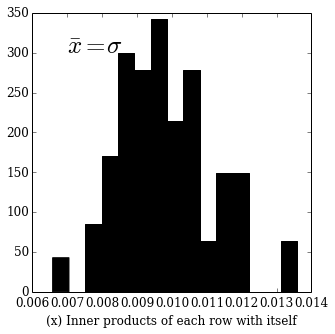

In [174]:
figsize(5,5)
h = hist(IP, bins=15, normed=True, color='k')
xlabel('(x) Inner products of each row with itself ')
text(0.007, 300, r'$\bar{x} = \sigma$', fontsize=25)
savefig('histogram1.pdf', bbox_inches='tight', dpi=300)

In [175]:
IP2 = np.zeros(len(D)*len(D))
for i in range(len(D)):
    for j in range(len(D)):
        if i!= j:
            IP2[i] = inner(D[:,i], D[:,j])

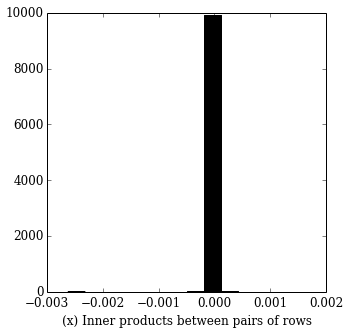

In [176]:
h2 = hist(IP2, bins=15, color='k')
xlabel('(x) Inner products between pairs of rows ')
savefig('histogram2.pdf', bbox_inches='tight', dpi=300)


# 2.4

In [187]:
D2 = random_matrix(50, 100)
len(D2[0])
len(D2[0,:])

100

In [188]:
IPD = np.zeros(len(D2))
for i in range(len(D2)):
    IPD[i] = inner(D2[:,i], D2[:,i])

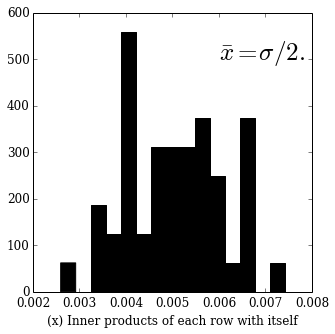

In [189]:
h2 = hist(IPD, bins=15, normed=True, color='k')
xlabel('(x) Inner products of each row with itself ')
text(0.006, 500, r'$\bar{x} = \sigma/2.$', fontsize=25)
savefig('histogram3.pdf', bbox_inches='tight', dpi=300)


In [190]:
IPD2 = np.zeros(len(D2)*len(D2))
for i in range(len(D2)):
    for j in range(len(D2)):
        if i!= j:
            IPD2[i] = inner(D2[:,i], D2[:,j])

(-0.001, 0.001)

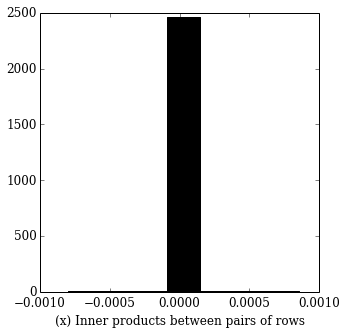

In [193]:
h2 = hist(IPD2, bins=15, color='k')
xlabel('(x) Inner products between pairs of rows ')
savefig('histogram4.pdf', bbox_inches='tight', dpi=300)
xlim(-0.001, 0.001)

# 2.5 

In [200]:
def euclidian_distance(v1, v2):
    Edist= sum((v1-v2)**2.0)
    return Edist

def random_100v_pairs(N_vectors, D2):
    Edist = np.zeros(N_vectors)
    Edist_t = np.zeros(N_vectors)

    for i in range (N_vectors):
        v1 = random.normal(0, 0.01, 100)
        v2 = random.normal(0, 0.01, 100)
        Edist[i] = euclidian_distance(v1, v2)
        v1t = dot(v1, D2.T)
        v2t = dot(v2, D2.T)
        Edist_t[i] = euclidian_distance(v1t, v2t)
    return Edist, Edist_t
    
     
    
    

In [203]:
e1, e2 = random_100v_pairs(10000, D2)


(array([   14.,   180.,  1021.,  2596.,  2903.,  2083.,   911.,   231.,
           50.,    11.]),
 array([ 0.01015115,  0.01236427,  0.01457739,  0.01679051,  0.01900364,
         0.02121676,  0.02342988,  0.02564301,  0.02785613,  0.03006925,
         0.03228238]),
 <a list of 10 Patch objects>)

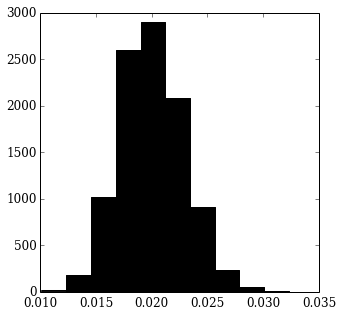

In [208]:
hist(e1, color='k')

(array([  1.60000000e+02,   1.49800000e+03,   3.05800000e+03,
          2.82700000e+03,   1.58100000e+03,   6.20000000e+02,
          1.90000000e+02,   5.30000000e+01,   1.10000000e+01,
          2.00000000e+00]),
 array([  3.65862660e-05,   5.62801666e-05,   7.59740672e-05,
          9.56679678e-05,   1.15361868e-04,   1.35055769e-04,
          1.54749670e-04,   1.74443570e-04,   1.94137471e-04,
          2.13831371e-04,   2.33525272e-04]),
 <a list of 10 Patch objects>)

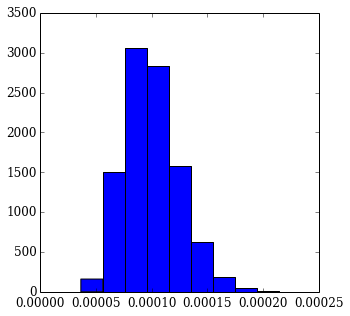

In [207]:
hist(e2)

# 3


In [173]:

import binascii
data = open('./dict_sample.txt', 'r')

In [211]:
with open('dict_sample.txt', 'r', newline='\n', encoding='utf-8') as myfile:
    data=myfile.readlines()
    x = list()
    for i in range(len(data)):
        data[i]=data[i].replace('\n', '')
        #data[i]=data[i].encode('utf-8')
        #m = hashlib.sha1(data[0])
        #bina = m.hexdigest()
        #x.append(bin(int.from_bytes(bina.encode(), 'big')))


In [210]:
def read_data(filename):
    """
    Reads data
    """
    with open(filename, 'r', newline='\n', encoding='utf-8') as myfile:
        data=myfile.readlines()
        x = list()
        for i in range(len(data)):
            data[i]=data[i].replace('\n', '')
    return data

def lenghts(data):
    """
    Returns all lenghts!
    """
    
    l = []
    for i in range(len(data)):
        l.append(len(data[i]))
    N = list(set(l))
    return N

def words_lenght(data, N):
    data_set = []
    for i in range(len(data)):
        if (len(data[i])==N):
            data_set.append(data[i])
    return data_set


def hashing(data):
    """
    Returns sha1 binary
    """
    
    x = []
    for i in range(len(data)):
        data[i]=data[i].encode('utf-8')
        m = hashlib.sha1(data[i])
        bina = m.hexdigest()
        x.append(bin(int.from_bytes(bina.encode(), 'big')))    
    return x

def hamming(word1, word2):
    """
    computes 1-H(a,b)/L
    """
    counter = 0
    for i in range(len(word1)):
        if word1[i]!=word2[i]:
            counter +=1
    return (1 - counter/len(word1))
    

def hamming_all(binaries):
    L = []
    for i in range(len(binaries)):
        for j in range(i,len(binaries)):
            if i!=j:
                L.append(hamming(binaries[i][:32], binaries[j][:32]))
    return L


def pairs_of_words(filename):
    """
    return the hamming of all pairs of words of the same
    length
    """
    data = read_data(filename)
    N = lenghts(data)
    All_Hs = []
    for i in range(len(N)):
        data_set = words_lenght(data, N[i])
        data_set_bin = hashing(data_set)
        Hs = hamming_all(data_set_bin)
        for j in range(len(Hs)):
            All_Hs.append(Hs[j])
    return(np.array(All_Hs))

def each_row(filename):
    data = read_data(filename)
    data_set_bin = hashing(data)

    row_HS = np.zeros(len(data_set_bin))
    for i in range(len(data_set_bin)):
        row_HS[i] = hamming(data_set_bin[i][:32], data_set_bin[i][:32])
           
    return(row_HS)


In [211]:
ham_data = pairs_of_words('dict_sample.txt')
ham_rows = each_row('dict_sample.txt')


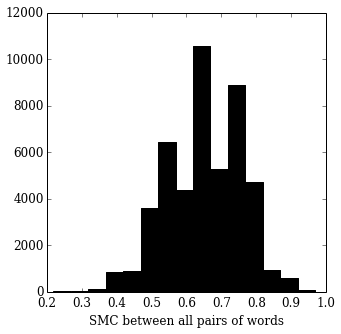

In [218]:
h = hist(ham_data, bins=15, color='k')
xlabel('SMC between all pairs of words')

savefig('histogram6.pdf', bbox_inches='tight', dpi=300)


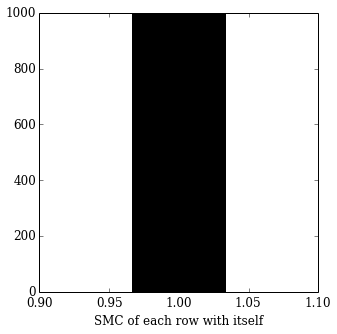

In [219]:
h2 = hist(ham_rows, bins=15, color='k')
xlim(0.9, 1.1)
xlabel('SMC of each row with itself ')
savefig('histogram7.pdf', bbox_inches='tight', dpi=300)


In [91]:

m = hashlib.sha1()
m.update(b'hola')
bina = m.hexdigest()

In [154]:
m.update(b'helo')
bina2 = m.hexdigest()
print(bina2)
print(bina)


be4848bcf5ecccff3754ee7eccf740524f4dbdcd
94e4f0624480eb442d864ca0251adcdc52c92ef0


In [159]:
bin(int.from_bytes(bina.encode(), 'big'))

'0b111001001101000110010100110100011001100011000000110110001100100011010000110100001110000011000001100101011000100011010000110100001100100110010000111000001101100011010001100011011000010011000000110010001101010011000101100001011001000110001101100100011000110011010100110010011000110011100100110010011001010110011000110000'

In [106]:
tyoe(m)

NameError: name 'tyoe' is not defined